In [1]:
import re
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd
import matplotlib as mp

In [183]:
r = requests.get('https://cbr.ru/currency_base/dynamics/?UniDbQuery.Posted=True&UniDbQuery.so=1&UniDbQuery.mode=1&UniDbQuery.date_req1=&UniDbQuery.date_req2=&UniDbQuery.VAL_NM_RQ=R01235&UniDbQuery.From=01.01.1992&UniDbQuery.To=08.09.2023')

In [184]:
b = bs(r.text, 'html.parser')

In [185]:
t = b.table

In [186]:
x = [i for i in t.stripped_strings][5:]

In [187]:
d = {'Date':[v for n,v in enumerate(x) if n % 3 == 0], 'Rate':[x[n+2] for n,v in enumerate(x) if n % 3 == 0]}

In [188]:
data = pd.DataFrame(data=d)

In [189]:
data

,Date,Rate
0,08.09.2023,"98,1961"
1,07.09.2023,"97,8439"
2,06.09.2023,"97,5383"
3,05.09.2023,"96,6199"
4,02.09.2023,"96,3411"
...,...,...
7168,15.07.1992,"130,2000"
7169,10.07.1992,"130,3000"
7170,08.07.1992,"130,5000"
7171,03.07.1992,"134,8000"


In [191]:
data['Date'] = pd.to_datetime(data['Date'], format='%d.%m.%Y', dayfirst=True)
data['Rate'] = data['Rate'].str.replace(',', '.')
data['Rate'] = data['Rate'].str.replace(' ', '')
data['Rate'] = pd.to_numeric(data['Rate']) 

In [192]:
m = data.set_index('Date').groupby(pd.Grouper(freq='MS')).mean()

<Axes: xlabel='Date'>

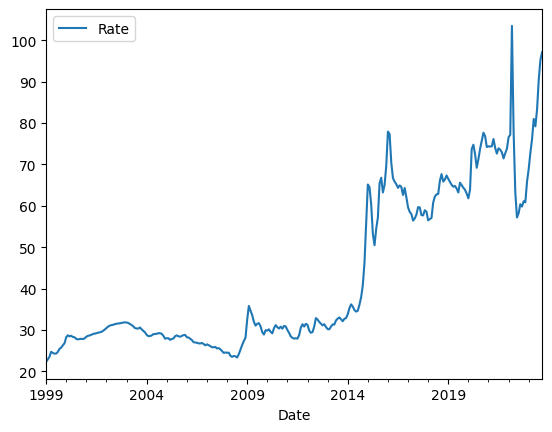

In [194]:
m[m.index > '01/01/1999'].plot()

<Axes: xlabel='Date'>

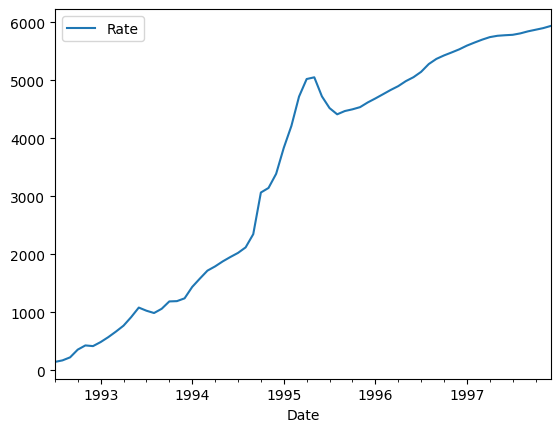

In [195]:
m[m.index < '01/01/1998'].plot()

***

In [120]:
import Parser
p = Parser.client()

In [213]:
url = 'https://economy.gov.ru/material/departments/d12/konyunktura_mirovyh_tovarnyh_rynkov/?type=&page='
url2 = 'https://economy.gov.ru'

headers = {
    'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64; rv:109.0) Gecko/20100101 Firefox/117.0',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,*/*;q=0.8',
    'Accept-Language': 'ru-RU,ru;q=0.8,en-US;q=0.5,en;q=0.3',
    # 'Accept-Encoding': 'gzip, deflate, br',
    'Referer': 'https://economy.gov.ru/material/departments/d12/konyunktura_mirovyh_tovarnyh_rynkov/',
    'DNT': '1',
    'Connection': 'keep-alive',
    # Requests sorts cookies= alphabetically
    # 'Cookie': 'session-cookie=17839a0e4a73358f75e0135eb4819f5bdfa917d513e526a3b5ffd28692550f32348af4815844d2d8fe0fd5037681b0e1; sp_test=1; sputnik_session=1694367273721|2; PHPSESSID=c3uvu7g1702pftlba6ku2g7rvh',
    'Upgrade-Insecure-Requests': '1',
    'Sec-Fetch-Dest': 'document',
    'Sec-Fetch-Mode': 'navigate',
    'Sec-Fetch-Site': 'same-origin',
    'Sec-Fetch-User': '?1',
    'Sec-GPC': '1',
}


In [214]:
#: Парсинг отдельных динамичесих элементов на странице

dates = []
prices = []
pat_dt = re.compile('(?P<date>\w* \d{4})')
pat_price = re.compile('(?P<usd>\d{1,3},\d{1,2})')

for counts in range(1, 5):
    resp = p.session.get(url=url+str(counts), headers=headers)

    data = bs(resp.text, 'html.parser')

    for i in data.find_all('a', attrs={'title':re.compile(u'Юралс')}):
        link = i['href']
        print(link)

        raw = p.session.get(url=url2+link, headers=headers)
        html_data = bs(raw.text, 'html.parser')

        txt = html_data.get_text(strip=True)

        dt = re.findall(pat_dt, txt)[1]
        dates.append(dt)

        pr = re.findall(pat_price, txt)[0]
        prices.append(pr)

print(dates)
print(prices)


        

/material/departments/d12/konyunktura_mirovyh_tovarnyh_rynkov/o_sredney_cene_na_neft_sorta_yurals_za_avgust_2023_goda.html
/material/departments/d12/konyunktura_mirovyh_tovarnyh_rynkov/o_sredney_cene_na_neft_sorta_yurals_za_iyul_2023_goda.html
/material/departments/d12/konyunktura_mirovyh_tovarnyh_rynkov/o_sredney_cene_na_neft_sorta_yurals_za_iyun_2023_goda.html
/material/departments/d12/konyunktura_mirovyh_tovarnyh_rynkov/o_sredney_cene_na_neft_sorta_yurals_za_may_2023_goda.html
/material/departments/d12/konyunktura_mirovyh_tovarnyh_rynkov/o_sredney_cene_na_neft_sorta_yurals_za_aprel_2023_goda.html
/material/departments/d12/konyunktura_mirovyh_tovarnyh_rynkov/o_sredney_cene_na_neft_sorta_yurals_za_mart_2023_goda.html
/material/departments/d12/konyunktura_mirovyh_tovarnyh_rynkov/o_sredney_cene_na_neft_sorta_yurals_za_fevral_2023_goda.html
/material/departments/d12/konyunktura_mirovyh_tovarnyh_rynkov/o_sredney_cene_na_neft_sorta_yurals_za_yanvar_2023_goda.html
/material/departments/d12/

In [192]:
raw = p.session.get(url=url2+'material/departments/d12/konyunktura_mirovyh_tovarnyh_rynkov/o_sredney_cene_na_neft_sorta_yurals_za_avgust_2023_goda.html', headers=headers)

html_data = bs(raw.text, 'html.parser')

In [203]:
for i in html_data.find_all('p', string=re.compile('\d{1,3},\d{1,3} долл')):
    print (i)

for d in html_data.find_all(string=re.compile('\w{1} \d{4} года')):
    print(d)


<p>73,73 долл. США за баррель</p>
О средней цене на нефть сорта «Юралс» за август 2023 года | Министерство экономического развития Российской Федерации

            О средней цене на нефть сорта «Юралс» за август 2023 года
        


In [209]:
txt = html_data.get_text(strip=True)

pat_dt = re.compile('(?P<date>\w* \d{4})')
pat_price = re.compile('(?P<usd>\d{1,3},\d{1,2})')

print(re.findall(pat_dt, txt)[1])
print(re.findall(pat_price, txt)[0])

август 2023
73,73


***

In [2]:
import datetime

In [2]:
# проверка даты
fmt = '%d.%m.%Y'

In [3]:
datetime.datetime.strftime(datetime.datetime.now(), '%d.%m.%Y')

'11.09.2023'

In [4]:
datetime.datetime.strptime('01.06.2022', fmt)

datetime.datetime(2022, 6, 1, 0, 0)

In [13]:
datetime.datetime.strptime('January 2023', '%B %Y')

datetime.datetime(2023, 1, 1, 0, 0)

In [ ]:
#Блок для переименования месяцев в номера
for item in list():
    for old, new in [('январь', '01'), ('февраль', '02'), ('март', '03'), ('апрель', '04'), ('май', '05'), ('июнь', '06'), ('июль', '07'), ('август','08'), ('сентябрь', '09'), ('октябрь', '10'), ('ноябрь', '11'), ('декабрь', '12')]:
        if old in item:
            item.replace(old, new)

In [22]:
datetime.datetime.strftime(datetime.datetime.now(), '%d-%B-%Y')

'11-September-2023'

In [17]:
def test(st):
    
    pat = r'\b(0[1-9]|[1-2]\d|3[0-1])\.(0[1-9]|1[0-2])\.\d{4}\b'
    d = re.fullmatch(pat, st)
    if not d:
        print('not ok') 

In [18]:
test('32.09.2023')


not ok
